### Taken from https://www.kaggle.com/endoruk1234/trafficlightdetection-fasterrcnn-pytorch

In [1]:
from time import time
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import cv2

from sklearn.model_selection import train_test_split, GroupKFold, StratifiedKFold

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

import torch
import torchvision

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.ops import nms

from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SequentialSampler

torch.cuda.empty_cache() 

import os


In [2]:
for dirname, _, filenames in os.walk('..\TLData'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\TLData\Annotations\Annotations\daySequence1\frameAnnotationsBOX.csv
..\TLData\Annotations\Annotations\daySequence1\frameAnnotationsBULB.csv
..\TLData\Annotations\Annotations\daySequence2\frameAnnotationsBOX.csv
..\TLData\Annotations\Annotations\daySequence2\frameAnnotationsBULB.csv
..\TLData\Annotations\Annotations\dayTrain\dayClip1\frameAnnotationsBOX.csv
..\TLData\Annotations\Annotations\dayTrain\dayClip1\frameAnnotationsBULB.csv
..\TLData\Annotations\Annotations\dayTrain\dayClip10\frameAnnotationsBOX.csv
..\TLData\Annotations\Annotations\dayTrain\dayClip10\frameAnnotationsBULB.csv
..\TLData\Annotations\Annotations\dayTrain\dayClip11\frameAnnotationsBOX.csv
..\TLData\Annotations\Annotations\dayTrain\dayClip11\frameAnnotationsBULB.csv
..\TLData\Annotations\Annotations\dayTrain\dayClip12\frameAnnotationsBOX.csv
..\TLData\Annotations\Annotations\dayTrain\dayClip12\frameAnnotationsBULB.csv
..\TLData\Annotations\Annotations\dayTrain\dayClip13\frameAnnotationsBOX.csv
..\TLData\Annotatio

..\TLData\daySequence1\daySequence1\frames\daySequence1--00071.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00072.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00073.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00074.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00075.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00076.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00077.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00078.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00079.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00080.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00081.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00082.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00083.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00084.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00085

..\TLData\daySequence1\daySequence1\frames\daySequence1--00193.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00194.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00195.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00196.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00197.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00198.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00199.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00200.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00201.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00202.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00203.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00204.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00205.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00206.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00207

..\TLData\daySequence1\daySequence1\frames\daySequence1--00315.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00316.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00317.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00318.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00319.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00320.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00321.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00322.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00323.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00324.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00325.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00326.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00327.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00328.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00329

..\TLData\daySequence1\daySequence1\frames\daySequence1--00437.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00438.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00439.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00440.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00441.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00442.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00443.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00444.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00445.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00446.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00447.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00448.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00449.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00450.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00451

..\TLData\daySequence1\daySequence1\frames\daySequence1--00559.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00560.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00561.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00562.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00563.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00564.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00565.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00566.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00567.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00568.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00569.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00570.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00571.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00572.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00573

..\TLData\daySequence1\daySequence1\frames\daySequence1--00681.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00682.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00683.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00684.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00685.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00686.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00687.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00688.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00689.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00690.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00691.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00692.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00693.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00694.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00695

..\TLData\daySequence1\daySequence1\frames\daySequence1--00803.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00804.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00805.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00806.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00807.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00808.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00809.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00810.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00811.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00812.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00813.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00814.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00815.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00816.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00817

..\TLData\daySequence1\daySequence1\frames\daySequence1--00925.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00926.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00927.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00928.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00929.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00930.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00931.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00932.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00933.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00934.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00935.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00936.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00937.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00938.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--00939

..\TLData\daySequence1\daySequence1\frames\daySequence1--01047.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01048.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01049.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01050.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01051.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01052.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01053.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01054.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01055.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01056.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01057.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01058.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01059.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01060.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01061

..\TLData\daySequence1\daySequence1\frames\daySequence1--01169.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01170.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01171.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01172.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01173.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01174.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01175.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01176.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01177.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01178.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01179.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01180.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01181.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01182.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01183

..\TLData\daySequence1\daySequence1\frames\daySequence1--01291.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01292.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01293.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01294.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01295.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01296.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01297.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01298.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01299.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01300.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01301.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01302.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01303.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01304.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01305

..\TLData\daySequence1\daySequence1\frames\daySequence1--01413.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01414.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01415.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01416.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01417.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01418.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01419.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01420.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01421.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01422.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01423.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01424.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01425.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01426.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--01427

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



..\TLData\daySequence1\daySequence1\frames\daySequence1--02748.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02749.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02750.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02751.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02752.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02753.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02754.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02755.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02756.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02757.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02758.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02759.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02760.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02761.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02762

..\TLData\daySequence1\daySequence1\frames\daySequence1--02870.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02871.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02872.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02873.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02874.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02875.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02876.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02877.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02878.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02879.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02880.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02881.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02882.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02883.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02884

..\TLData\daySequence1\daySequence1\frames\daySequence1--02992.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02993.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02994.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02995.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02996.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02997.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02998.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--02999.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03000.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03001.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03002.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03003.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03004.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03005.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03006

..\TLData\daySequence1\daySequence1\frames\daySequence1--03114.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03115.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03116.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03117.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03118.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03119.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03120.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03121.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03122.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03123.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03124.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03125.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03126.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03127.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03128

..\TLData\daySequence1\daySequence1\frames\daySequence1--03236.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03237.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03238.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03239.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03240.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03241.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03242.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03243.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03244.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03245.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03246.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03247.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03248.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03249.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03250

..\TLData\daySequence1\daySequence1\frames\daySequence1--03358.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03359.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03360.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03361.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03362.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03363.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03364.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03365.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03366.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03367.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03368.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03369.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03370.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03371.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03372

..\TLData\daySequence1\daySequence1\frames\daySequence1--03480.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03481.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03482.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03483.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03484.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03485.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03486.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03487.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03488.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03489.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03490.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03491.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03492.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03493.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03494

..\TLData\daySequence1\daySequence1\frames\daySequence1--03602.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03603.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03604.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03605.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03606.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03607.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03608.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03609.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03610.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03611.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03612.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03613.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03614.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03615.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03616

..\TLData\daySequence1\daySequence1\frames\daySequence1--03724.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03725.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03726.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03727.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03728.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03729.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03730.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03731.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03732.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03733.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03734.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03735.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03736.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03737.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03738

..\TLData\daySequence1\daySequence1\frames\daySequence1--03846.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03847.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03848.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03849.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03850.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03851.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03852.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03853.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03854.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03855.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03856.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03857.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03858.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03859.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03860

..\TLData\daySequence1\daySequence1\frames\daySequence1--03968.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03969.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03970.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03971.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03972.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03973.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03974.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03975.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03976.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03977.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03978.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03979.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03980.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03981.jpg
..\TLData\daySequence1\daySequence1\frames\daySequence1--03982

..\TLData\daySequence2\daySequence2\frames\daySequence2--00029.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00030.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00031.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00032.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00033.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00034.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00035.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00036.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00037.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00038.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00039.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00040.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00041.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00042.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00043

..\TLData\daySequence2\daySequence2\frames\daySequence2--00151.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00152.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00153.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00154.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00155.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00156.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00157.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00158.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00159.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00160.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00161.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00162.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00163.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00164.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--00165

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




..\TLData\daySequence2\daySequence2\frames\daySequence2--01556.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01557.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01558.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01559.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01560.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01561.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01562.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01563.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01564.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01565.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01566.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01567.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01568.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01569.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--0157

..\TLData\daySequence2\daySequence2\frames\daySequence2--01678.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01679.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01680.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01681.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01682.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01683.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01684.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01685.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01686.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01687.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01688.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01689.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01690.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01691.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01692

..\TLData\daySequence2\daySequence2\frames\daySequence2--01800.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01801.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01802.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01803.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01804.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01805.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01806.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01807.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01808.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01809.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01810.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01811.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01812.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01813.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01814

..\TLData\daySequence2\daySequence2\frames\daySequence2--01922.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01923.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01924.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01925.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01926.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01927.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01928.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01929.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01930.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01931.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01932.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01933.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01934.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01935.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--01936

..\TLData\daySequence2\daySequence2\frames\daySequence2--02044.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02045.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02046.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02047.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02048.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02049.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02050.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02051.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02052.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02053.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02054.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02055.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02056.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02057.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02058

..\TLData\daySequence2\daySequence2\frames\daySequence2--02166.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02167.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02168.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02169.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02170.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02171.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02172.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02173.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02174.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02175.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02176.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02177.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02178.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02179.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02180

..\TLData\daySequence2\daySequence2\frames\daySequence2--02288.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02289.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02290.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02291.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02292.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02293.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02294.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02295.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02296.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02297.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02298.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02299.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02300.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02301.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02302

..\TLData\daySequence2\daySequence2\frames\daySequence2--02410.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02411.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02412.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02413.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02414.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02415.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02416.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02417.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02418.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02419.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02420.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02421.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02422.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02423.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02424

..\TLData\daySequence2\daySequence2\frames\daySequence2--02532.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02533.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02534.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02535.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02536.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02537.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02538.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02539.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02540.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02541.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02542.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02543.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02544.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02545.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02546

..\TLData\daySequence2\daySequence2\frames\daySequence2--02654.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02655.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02656.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02657.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02658.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02659.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02660.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02661.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02662.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02663.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02664.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02665.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02666.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02667.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02668

..\TLData\daySequence2\daySequence2\frames\daySequence2--02776.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02777.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02778.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02779.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02780.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02781.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02782.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02783.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02784.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02785.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02786.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02787.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02788.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02789.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02790

..\TLData\daySequence2\daySequence2\frames\daySequence2--02898.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02899.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02900.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02901.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02902.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02903.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02904.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02905.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02906.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02907.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02908.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02909.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02910.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02911.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--02912

..\TLData\daySequence2\daySequence2\frames\daySequence2--03020.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--03021.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--03022.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--03023.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--03024.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--03025.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--03026.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--03027.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--03028.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--03029.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--03030.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--03031.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--03032.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--03033.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--03034

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




..\TLData\daySequence2\daySequence2\frames\daySequence2--04454.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04455.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04456.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04457.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04458.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04459.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04460.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04461.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04462.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04463.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04464.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04465.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04466.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04467.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--0446

..\TLData\daySequence2\daySequence2\frames\daySequence2--04576.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04577.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04578.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04579.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04580.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04581.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04582.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04583.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04584.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04585.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04586.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04587.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04588.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04589.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04590

..\TLData\daySequence2\daySequence2\frames\daySequence2--04698.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04699.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04700.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04701.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04702.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04703.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04704.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04705.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04706.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04707.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04708.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04709.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04710.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04711.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04712

..\TLData\daySequence2\daySequence2\frames\daySequence2--04820.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04821.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04822.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04823.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04824.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04825.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04826.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04827.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04828.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04829.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04830.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04831.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04832.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04833.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04834

..\TLData\daySequence2\daySequence2\frames\daySequence2--04942.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04943.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04944.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04945.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04946.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04947.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04948.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04949.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04950.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04951.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04952.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04953.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04954.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04955.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--04956

..\TLData\daySequence2\daySequence2\frames\daySequence2--05064.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05065.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05066.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05067.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05068.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05069.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05070.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05071.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05072.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05073.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05074.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05075.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05076.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05077.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05078

..\TLData\daySequence2\daySequence2\frames\daySequence2--05186.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05187.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05188.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05189.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05190.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05191.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05192.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05193.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05194.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05195.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05196.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05197.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05198.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05199.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05200

..\TLData\daySequence2\daySequence2\frames\daySequence2--05308.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05309.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05310.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05311.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05312.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05313.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05314.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05315.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05316.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05317.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05318.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05319.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05320.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05321.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05322

..\TLData\daySequence2\daySequence2\frames\daySequence2--05430.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05431.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05432.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05433.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05434.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05435.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05436.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05437.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05438.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05439.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05440.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05441.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05442.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05443.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05444

..\TLData\daySequence2\daySequence2\frames\daySequence2--05552.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05553.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05554.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05555.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05556.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05557.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05558.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05559.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05560.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05561.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05562.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05563.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05564.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05565.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05566

..\TLData\daySequence2\daySequence2\frames\daySequence2--05674.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05675.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05676.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05677.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05678.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05679.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05680.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05681.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05682.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05683.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05684.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05685.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05686.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05687.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05688

..\TLData\daySequence2\daySequence2\frames\daySequence2--05796.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05797.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05798.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05799.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05800.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05801.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05802.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05803.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05804.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05805.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05806.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05807.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05808.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05809.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05810

..\TLData\daySequence2\daySequence2\frames\daySequence2--05918.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05919.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05920.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05921.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05922.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05923.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05924.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05925.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05926.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05927.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05928.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05929.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05930.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05931.jpg
..\TLData\daySequence2\daySequence2\frames\daySequence2--05932

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--01881.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--01882.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--01883.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--01884.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--01885.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--01886.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--01887.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--01888.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--01889.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--01890.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--01891.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--01892.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--01893.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--01894.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--01895.jpg
..\TLData\dayTrain\dayTrain\dayClip1\fra

..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02009.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02010.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02011.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02012.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02013.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02014.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02015.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02016.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02017.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02018.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02019.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02020.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02021.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02022.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02023.jpg
..\TLData\dayTrain\dayTrain\dayClip1\fra

..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02137.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02138.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02139.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02140.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02141.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02142.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02143.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02144.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02145.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02146.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02147.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02148.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02149.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02150.jpg
..\TLData\dayTrain\dayTrain\dayClip1\frames\dayClip1--02151.jpg
..\TLData\dayTrain\dayTrain\dayClip1\fra

..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00051.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00052.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00053.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00054.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00055.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00056.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00057.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00058.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00059.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00060.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00061.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00062.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00063.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00064.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00065.jpg
..\TLData\

..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00175.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00176.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00177.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00178.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00179.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00180.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00181.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00182.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00183.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00184.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00185.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00186.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00187.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00188.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00189.jpg
..\TLData\

..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00299.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00300.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00301.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00302.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00303.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00304.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00305.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00306.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00307.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00308.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00309.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00310.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00311.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00312.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00313.jpg
..\TLData\

..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00423.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00424.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00425.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00426.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00427.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00428.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00429.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00430.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00431.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00432.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00433.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00434.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00435.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00436.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00437.jpg
..\TLData\

..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00547.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00548.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00549.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00550.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00551.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00552.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00553.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00554.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00555.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00556.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00557.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00558.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00559.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00560.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00561.jpg
..\TLData\

..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00671.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00672.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00673.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00674.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00675.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00676.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00677.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00678.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00679.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00680.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00681.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00682.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00683.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00684.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00685.jpg
..\TLData\

..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00795.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00796.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00797.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00798.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00799.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00800.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00801.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00802.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00803.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00804.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00805.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00806.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00807.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00808.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00809.jpg
..\TLData\

..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00919.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00920.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00921.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00922.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00923.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00924.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00925.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00926.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00927.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00928.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00929.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00930.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00931.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00932.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--00933.jpg
..\TLData\

..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--01043.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--01044.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--01045.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--01046.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--01047.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--01048.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--01049.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--01050.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--01051.jpg
..\TLData\dayTrain\dayTrain\dayClip11\frames\dayClip11--01052.jpg
..\TLData\dayTrain\dayTrain\dayClip12\frames\dayClip12--00000.jpg
..\TLData\dayTrain\dayTrain\dayClip12\frames\dayClip12--00001.jpg
..\TLData\dayTrain\dayTrain\dayClip12\frames\dayClip12--00002.jpg
..\TLData\dayTrain\dayTrain\dayClip12\frames\dayClip12--00003.jpg
..\TLData\dayTrain\dayTrain\dayClip12\frames\dayClip12--00004.jpg
..\TLData\

..\TLData\dayTrain\dayTrain\dayClip12\frames\dayClip12--00114.jpg
..\TLData\dayTrain\dayTrain\dayClip12\frames\dayClip12--00115.jpg
..\TLData\dayTrain\dayTrain\dayClip12\frames\dayClip12--00116.jpg
..\TLData\dayTrain\dayTrain\dayClip12\frames\dayClip12--00117.jpg


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00391.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00392.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00393.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00394.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00395.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00396.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00397.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00398.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00399.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00400.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00401.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00402.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00403.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00404.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00405.jpg
..\TLData\dayTrain\dayTrain\dayClip3\fra

..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00519.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00520.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00521.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00522.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00523.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00524.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00525.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00526.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00527.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00528.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00529.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00530.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00531.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00532.jpg
..\TLData\dayTrain\dayTrain\dayClip3\frames\dayClip3--00533.jpg
..\TLData\dayTrain\dayTrain\dayClip3\fra

..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00004.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00005.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00006.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00007.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00008.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00009.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00010.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00011.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00012.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00013.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00014.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00015.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00016.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00017.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00018.jpg
..\TLData\dayTrain\dayTrain\dayClip4\fra

..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00132.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00133.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00134.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00135.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00136.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00137.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00138.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00139.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00140.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00141.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00142.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00143.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00144.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00145.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00146.jpg
..\TLData\dayTrain\dayTrain\dayClip4\fra

..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00260.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00261.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00262.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00263.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00264.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00265.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00266.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00267.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00268.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00269.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00270.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00271.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00272.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00273.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00274.jpg
..\TLData\dayTrain\dayTrain\dayClip4\fra

..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00388.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00389.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00390.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00391.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00392.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00393.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00394.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00395.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00396.jpg
..\TLData\dayTrain\dayTrain\dayClip4\frames\dayClip4--00397.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00000.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00001.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00002.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00003.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00004.jpg
..\TLData\dayTrain\dayTrain\dayClip5\fra

..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00118.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00119.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00120.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00121.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00122.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00123.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00124.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00125.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00126.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00127.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00128.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00129.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00130.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00131.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00132.jpg
..\TLData\dayTrain\dayTrain\dayClip5\fra

..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00246.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00247.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00248.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00249.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00250.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00251.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00252.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00253.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00254.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00255.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00256.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00257.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00258.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00259.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00260.jpg
..\TLData\dayTrain\dayTrain\dayClip5\fra

..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00374.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00375.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00376.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00377.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00378.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00379.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00380.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00381.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00382.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00383.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00384.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00385.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00386.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00387.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00388.jpg
..\TLData\dayTrain\dayTrain\dayClip5\fra

..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00502.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00503.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00504.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00505.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00506.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00507.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00508.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00509.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00510.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00511.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00512.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00513.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00514.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00515.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00516.jpg
..\TLData\dayTrain\dayTrain\dayClip5\fra

..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00630.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00631.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00632.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00633.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00634.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00635.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00636.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00637.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00638.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00639.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00640.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00641.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00642.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00643.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00644.jpg
..\TLData\dayTrain\dayTrain\dayClip5\fra

..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00758.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00759.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00760.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00761.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00762.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00763.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00764.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00765.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00766.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00767.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00768.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00769.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00770.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00771.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--00772.jpg
..\TLData\dayTrain\dayTrain\dayClip5\fra

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02221.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02222.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02223.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02224.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02225.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02226.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02227.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02228.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02229.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02230.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02231.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02232.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02233.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02234.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02235.jpg
..\TLData\dayTrain\dayTrain\dayClip5\fr

..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02349.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02350.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02351.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02352.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02353.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02354.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02355.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02356.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02357.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02358.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02359.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02360.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02361.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02362.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02363.jpg
..\TLData\dayTrain\dayTrain\dayClip5\fra

..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02477.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02478.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02479.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02480.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02481.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02482.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02483.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02484.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02485.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02486.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02487.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02488.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02489.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02490.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02491.jpg
..\TLData\dayTrain\dayTrain\dayClip5\fra

..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02605.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02606.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02607.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02608.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02609.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02610.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02611.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02612.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02613.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02614.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02615.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02616.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02617.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02618.jpg
..\TLData\dayTrain\dayTrain\dayClip5\frames\dayClip5--02619.jpg
..\TLData\dayTrain\dayTrain\dayClip5\fra

..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00066.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00067.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00068.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00069.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00070.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00071.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00072.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00073.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00074.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00075.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00076.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00077.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00078.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00079.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00080.jpg
..\TLData\dayTrain\dayTrain\dayClip6\fra

..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00194.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00195.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00196.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00197.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00198.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00199.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00200.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00201.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00202.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00203.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00204.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00205.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00206.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00207.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00208.jpg
..\TLData\dayTrain\dayTrain\dayClip6\fra

..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00322.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00323.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00324.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00325.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00326.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00327.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00328.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00329.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00330.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00331.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00332.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00333.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00334.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00335.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00336.jpg
..\TLData\dayTrain\dayTrain\dayClip6\fra

..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00450.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00451.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00452.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00453.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00454.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00455.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00456.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00457.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00458.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00459.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00460.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00461.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00462.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00463.jpg
..\TLData\dayTrain\dayTrain\dayClip6\frames\dayClip6--00464.jpg
..\TLData\dayTrain\dayTrain\dayClip6\fra

..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00110.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00111.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00112.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00113.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00114.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00115.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00116.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00117.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00118.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00119.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00120.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00121.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00122.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00123.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00124.jpg
..\TLData\dayTrain\dayTrain\dayClip7\fra

..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00238.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00239.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00240.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00241.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00242.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00243.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00244.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00245.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00246.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00247.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00248.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00249.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00250.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00251.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00252.jpg
..\TLData\dayTrain\dayTrain\dayClip7\fra

..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00366.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00367.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00368.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00369.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00370.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00371.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00372.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00373.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00374.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00375.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00376.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00377.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00378.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00379.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00380.jpg
..\TLData\dayTrain\dayTrain\dayClip7\fra

..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00494.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00495.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00496.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00497.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00498.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00499.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00500.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00501.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00502.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00503.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00504.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00505.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00506.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00507.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--00508.jpg
..\TLData\dayTrain\dayTrain\dayClip7\fra

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--01948.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--01949.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--01950.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--01951.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--01952.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--01953.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--01954.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--01955.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--01956.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--01957.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--01958.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--01959.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--01960.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--01961.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--01962.jpg
..\TLData\dayTrain\dayTrain\dayClip7\fr

..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02076.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02077.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02078.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02079.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02080.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02081.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02082.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02083.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02084.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02085.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02086.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02087.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02088.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02089.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02090.jpg
..\TLData\dayTrain\dayTrain\dayClip7\fra

..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02204.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02205.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02206.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02207.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02208.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02209.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02210.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02211.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02212.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02213.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02214.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02215.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02216.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02217.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02218.jpg
..\TLData\dayTrain\dayTrain\dayClip7\fra

..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02332.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02333.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02334.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02335.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02336.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02337.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02338.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02339.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02340.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02341.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02342.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02343.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02344.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02345.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02346.jpg
..\TLData\dayTrain\dayTrain\dayClip7\fra

..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02460.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02461.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02462.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02463.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02464.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02465.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02466.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02467.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02468.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02469.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02470.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02471.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02472.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02473.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02474.jpg
..\TLData\dayTrain\dayTrain\dayClip7\fra

..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02588.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02589.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02590.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02591.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02592.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02593.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02594.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02595.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02596.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02597.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02598.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02599.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02600.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02601.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02602.jpg
..\TLData\dayTrain\dayTrain\dayClip7\fra

..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02716.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02717.jpg
..\TLData\dayTrain\dayTrain\dayClip7\frames\dayClip7--02718.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00000.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00001.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00002.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00003.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00004.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00005.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00006.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00007.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00008.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00009.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00010.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00011.jpg
..\TLData\dayTrain\dayTrain\dayClip8\fra

..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00125.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00126.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00127.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00128.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00129.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00130.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00131.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00132.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00133.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00134.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00135.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00136.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00137.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00138.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00139.jpg
..\TLData\dayTrain\dayTrain\dayClip8\fra

..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00253.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00254.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00255.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00256.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00257.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00258.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00259.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00260.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00261.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00262.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00263.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00264.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00265.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00266.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00267.jpg
..\TLData\dayTrain\dayTrain\dayClip8\fra

..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00381.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00382.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00383.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00384.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00385.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00386.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00387.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00388.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00389.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00390.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00391.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00392.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00393.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00394.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00395.jpg
..\TLData\dayTrain\dayTrain\dayClip8\fra

..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00509.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00510.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00511.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00512.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00513.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00514.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00515.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00516.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00517.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00518.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00519.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00520.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00521.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00522.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00523.jpg
..\TLData\dayTrain\dayTrain\dayClip8\fra

..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00637.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00638.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00639.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00640.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00641.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00642.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00643.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00644.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00645.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00646.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00647.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00648.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00649.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00650.jpg
..\TLData\dayTrain\dayTrain\dayClip8\frames\dayClip8--00651.jpg
..\TLData\dayTrain\dayTrain\dayClip8\fra

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00351.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00352.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00353.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00354.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00355.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00356.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00357.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00358.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00359.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00360.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00361.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00362.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00363.jpg
..\TLData\nightSequence1\nightSequence1\frames\nig

..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00463.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00464.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00465.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00466.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00467.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00468.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00469.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00470.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00471.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00472.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00473.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00474.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00475.jpg
..\TLData\nightSequence1\nightSequence1\frames\nigh

..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00575.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00576.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00577.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00578.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00579.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00580.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00581.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00582.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00583.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00584.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00585.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00586.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00587.jpg
..\TLData\nightSequence1\nightSequence1\frames\nigh

..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00687.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00688.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00689.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00690.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00691.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00692.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00693.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00694.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00695.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00696.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00697.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00698.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00699.jpg
..\TLData\nightSequence1\nightSequence1\frames\nigh

..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00799.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00800.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00801.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00802.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00803.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00804.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00805.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00806.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00807.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00808.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00809.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00810.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00811.jpg
..\TLData\nightSequence1\nightSequence1\frames\nigh

..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00911.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00912.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00913.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00914.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00915.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00916.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00917.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00918.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00919.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00920.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00921.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00922.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--00923.jpg
..\TLData\nightSequence1\nightSequence1\frames\nigh

..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01023.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01024.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01025.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01026.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01027.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01028.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01029.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01030.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01031.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01032.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01033.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01034.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01035.jpg
..\TLData\nightSequence1\nightSequence1\frames\nigh

..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01135.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01136.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01137.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01138.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01139.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01140.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01141.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01142.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01143.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01144.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01145.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01146.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01147.jpg
..\TLData\nightSequence1\nightSequence1\frames\nigh

..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01247.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01248.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01249.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01250.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01251.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01252.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01253.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01254.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01255.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01256.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01257.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01258.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01259.jpg
..\TLData\nightSequence1\nightSequence1\frames\nigh

..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01359.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01360.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01361.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01362.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01363.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01364.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01365.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01366.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01367.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01368.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01369.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01370.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01371.jpg
..\TLData\nightSequence1\nightSequence1\frames\nigh

..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01471.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01472.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01473.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01474.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01475.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01476.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01477.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01478.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01479.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01480.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01481.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01482.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01483.jpg
..\TLData\nightSequence1\nightSequence1\frames\nigh

..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01583.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01584.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01585.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01586.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01587.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01588.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01589.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01590.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01591.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01592.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01593.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01594.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01595.jpg
..\TLData\nightSequence1\nightSequence1\frames\nigh

..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01695.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01696.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01697.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01698.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01699.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01700.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01701.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01702.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01703.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01704.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01705.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01706.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--01707.jpg
..\TLData\nightSequence1\nightSequence1\frames\nigh

..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--03745.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--03746.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--03747.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--03748.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--03749.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--03750.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--03751.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--03752.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--03753.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--03754.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--03755.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--03756.jpg
..\TLData\nightSequence1\nightSequence1\frames\nightSequence1--03757.jpg
..\TLData\nightSequence1\nightSequence1\frames\nigh

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00144.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00145.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00146.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00147.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00148.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00149.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00150.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00151.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00152.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00153.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00154.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00155.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00156.jpg
..\TLData\nightSequence2\nightSequence2\frames\nig

..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00256.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00257.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00258.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00259.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00260.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00261.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00262.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00263.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00264.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00265.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00266.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00267.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00268.jpg
..\TLData\nightSequence2\nightSequence2\frames\nigh

..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00368.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00369.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00370.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00371.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00372.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00373.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00374.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00375.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00376.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00377.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00378.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00379.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00380.jpg
..\TLData\nightSequence2\nightSequence2\frames\nigh

..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00480.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00481.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00482.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00483.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00484.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00485.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00486.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00487.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00488.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00489.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00490.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00491.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00492.jpg
..\TLData\nightSequence2\nightSequence2\frames\nigh

..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00592.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00593.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00594.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00595.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00596.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00597.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00598.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00599.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00600.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00601.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00602.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00603.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00604.jpg
..\TLData\nightSequence2\nightSequence2\frames\nigh

..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00704.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00705.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00706.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00707.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00708.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00709.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00710.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00711.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00712.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00713.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00714.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00715.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00716.jpg
..\TLData\nightSequence2\nightSequence2\frames\nigh

..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00816.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00817.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00818.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00819.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00820.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00821.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00822.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00823.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00824.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00825.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00826.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00827.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00828.jpg
..\TLData\nightSequence2\nightSequence2\frames\nigh

..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00928.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00929.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00930.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00931.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00932.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00933.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00934.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00935.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00936.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00937.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00938.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00939.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--00940.jpg
..\TLData\nightSequence2\nightSequence2\frames\nigh

..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01040.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01041.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01042.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01043.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01044.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01045.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01046.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01047.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01048.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01049.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01050.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01051.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01052.jpg
..\TLData\nightSequence2\nightSequence2\frames\nigh

..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01152.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01153.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01154.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01155.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01156.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--01157.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02861.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02862.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02863.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02864.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02865.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02866.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02867.jpg
..\TLData\nightSequence2\nightSequence2\frames\nigh

..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02967.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02968.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02969.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02970.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02971.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02972.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02973.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02974.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02975.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02976.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02977.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02978.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--02979.jpg
..\TLData\nightSequence2\nightSequence2\frames\nigh

..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03079.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03080.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03081.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03082.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03083.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03084.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03085.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03086.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03087.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03088.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03089.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03090.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03091.jpg
..\TLData\nightSequence2\nightSequence2\frames\nigh

..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03191.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03192.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03193.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03194.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03195.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03196.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03197.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03198.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03199.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03200.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03201.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03202.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03203.jpg
..\TLData\nightSequence2\nightSequence2\frames\nigh

..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03303.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03304.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03305.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03306.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03307.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03308.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03309.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03310.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03311.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03312.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03313.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03314.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--03315.jpg
..\TLData\nightSequence2\nightSequence2\frames\nigh

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04755.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04756.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04757.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04758.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04759.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04760.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04761.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04762.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04763.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04764.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04765.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04766.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04767.jpg
..\TLData\nightSequence2\nightSequence2\frames\nigh

..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04867.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04868.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04869.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04870.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04871.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04872.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04873.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04874.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04875.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04876.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04877.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04878.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04879.jpg
..\TLData\nightSequence2\nightSequence2\frames\nigh

..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04979.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04980.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04981.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04982.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04983.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04984.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04985.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04986.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04987.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04988.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04989.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04990.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--04991.jpg
..\TLData\nightSequence2\nightSequence2\frames\nigh

..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--05091.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--05092.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--05093.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--05094.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--05095.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--05096.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--05097.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--05098.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--05099.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--05100.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--05101.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--05102.jpg
..\TLData\nightSequence2\nightSequence2\frames\nightSequence2--05103.jpg
..\TLData\nightSequence2\nightSequence2\frames\nigh

..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00276.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00277.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00278.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00279.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00280.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00281.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00282.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00283.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00284.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00285.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00286.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00287.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00288.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00

..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00389.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00390.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00391.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00392.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00393.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00394.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00395.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00396.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00397.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00398.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00399.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00400.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00401.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00

..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00502.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00503.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00504.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00505.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00506.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00507.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00508.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00509.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00510.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00511.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00512.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00513.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00514.jpg
..\TLData\nightTrain\nightTrain\nightClip1\frames\nightClip1--00

..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00024.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00025.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00026.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00027.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00028.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00029.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00030.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00031.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00032.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00033.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00034.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00035.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00036.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00

..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00137.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00138.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00139.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00140.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00141.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00142.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00143.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00144.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00145.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00146.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00147.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00148.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00149.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00

..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00250.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00251.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00252.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00253.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00254.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00255.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00256.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00257.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00258.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00259.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00260.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00261.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00262.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00

..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00363.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00364.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00365.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00366.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00367.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00368.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00369.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00370.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00371.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00372.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00373.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00374.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00375.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00

..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00476.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00477.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00478.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00479.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00480.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00481.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00482.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00483.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00484.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00485.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00486.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00487.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00488.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00

..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00589.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00590.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00591.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00592.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00593.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00594.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00595.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00596.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00597.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00598.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00599.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00600.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00601.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00

..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00702.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00703.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00704.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00705.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00706.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00707.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00708.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00709.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00710.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00711.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00712.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00713.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00714.jpg
..\TLData\nightTrain\nightTrain\nightClip2\frames\nightClip2--00

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00637.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00638.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00639.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00640.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00641.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00642.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00643.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00644.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00645.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00646.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00647.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00648.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00649.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00

..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00750.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00751.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00752.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00753.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00754.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00755.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00756.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00757.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00758.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00759.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00760.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00761.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00762.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00

..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00863.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00864.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00865.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00866.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00867.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00868.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00869.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00870.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00871.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00872.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00873.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00874.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00875.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00

..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00976.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00977.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00978.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00979.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00980.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00981.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00982.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00983.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00984.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00985.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00986.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00987.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00988.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--00

..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--01089.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--01090.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--01091.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--01092.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--01093.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--01094.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--01095.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--01096.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--01097.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--01098.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--01099.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--01100.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--01101.jpg
..\TLData\nightTrain\nightTrain\nightClip4\frames\nightClip4--01

..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00097.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00098.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00099.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00100.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00101.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00102.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00103.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00104.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00105.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00106.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00107.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00108.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00109.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00

..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00210.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00211.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00212.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00213.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00214.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00215.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00216.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00217.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00218.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00219.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00220.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00221.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00222.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00

..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00323.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00324.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00325.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00326.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00327.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00328.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00329.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00330.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00331.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00332.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00333.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00334.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00335.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00

..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00436.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00437.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00438.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00439.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00440.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00441.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00442.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00443.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00444.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00445.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00446.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00447.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00448.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00

..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00549.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00550.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00551.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00552.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00553.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00554.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00555.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00556.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00557.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00558.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00559.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00560.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00561.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00

..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00662.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00663.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00664.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00665.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00666.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00667.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00668.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00669.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00670.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00671.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00672.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00673.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00674.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00

..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00775.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00776.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00777.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00778.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00779.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00780.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00781.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00782.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00783.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00784.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00785.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00786.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00787.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00

..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00888.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00889.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00890.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00891.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00892.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00893.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00894.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00895.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00896.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00897.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00898.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00899.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00900.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--00

..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--01001.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--01002.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--01003.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--01004.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--01005.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--01006.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--01007.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--01008.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--01009.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--01010.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--01011.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--01012.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--01013.jpg
..\TLData\nightTrain\nightTrain\nightClip5\frames\nightClip5--01

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
DATA_PATH = '..\TLData'
os.listdir(DATA_PATH)

In [4]:
DAY_TRAIN_PATH = '..\TLData\Annotations\Annotations\dayTrain\\'
NIGHT_TRAIN_PATH = '..\TLData\Annotations\Annotations\nightTrain\\'

In [5]:
train_day = []
for clipName in tqdm(sorted(os.listdir(DAY_TRAIN_PATH))):
    df = pd.read_csv(os.path.join(DAY_TRAIN_PATH,clipName,'frameAnnotationsBOX.csv'),sep=';')
    train_day.append(df)
    
train_day_df = pd.concat(train_day,axis=0)

In [6]:
df = df.drop(['Origin file','Origin track','Origin track frame number'],axis=1)

In [7]:
df.head()

In [8]:
def changeFilename(x):
    filename = x.Filename
    
    splitted = filename.split('/')
    clipName = splitted[-1].split('--')[0]
   
    return os.path.join(DATA_PATH,f'dayTrain/dayTrain/{clipName}/frames/{splitted[-1]}')

df['Filename'] = df.apply(changeFilename,axis=1)

In [9]:
df['Annotation tag'].unique()

In [10]:
label_to_idx = {'go':1, 'warning':2, 'stop': 3}
idx_to_label = {v:k for k,v in label_to_idx.items()}

def changeAnnotation(x):
    if 'go' in x['Annotation tag']:
        return label_to_idx['go']
    elif 'warning' in x['Annotation tag']:
        return label_to_idx['warning']
    elif 'stop' in x['Annotation tag']:
        return label_to_idx['stop']
    
df['Annotation tag'] = df.apply(changeAnnotation,axis=1)

annotation_tags = df['Annotation tag'].unique()
annotation_tags

In [11]:
df.columns = ['image_id','label','x_min','y_min','x_max','y_max','frame']

In [12]:
fig, ax = plt.subplots(len(annotation_tags),1,figsize=(15,10*len(annotation_tags)))

for i, tag in enumerate(annotation_tags):
    sample = df[df['label']==tag].sample(1)
    bbox = sample[['x_min','y_min','x_max','y_max']].values[0]
    
    image = cv2.imread(sample.image_id.values[0])
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    cv2.rectangle(image,(bbox[0],bbox[1]),(bbox[2],bbox[3]),(220, 0, 0), 2)
    
    ax[i].set_title(idx_to_label[tag])
    ax[i].set_axis_off()
    ax[i].imshow(image)

In [13]:
df['clipNames'] = df[['image_id']].applymap(lambda x: x.split('frames/')[1])
df['clipNames'].unique()

array(['dayClip9--00000.jpg', 'dayClip9--00001.jpg',
       'dayClip9--00002.jpg', 'dayClip9--00003.jpg',
       'dayClip9--00004.jpg', 'dayClip9--00005.jpg',
       'dayClip9--00006.jpg', 'dayClip9--00007.jpg',
       'dayClip9--00008.jpg', 'dayClip9--00009.jpg',
       'dayClip9--00010.jpg', 'dayClip9--00011.jpg',
       'dayClip9--00012.jpg', 'dayClip9--00013.jpg',
       'dayClip9--00014.jpg', 'dayClip9--00015.jpg',
       'dayClip9--00016.jpg', 'dayClip9--00017.jpg',
       'dayClip9--00018.jpg', 'dayClip9--00019.jpg',
       'dayClip9--00020.jpg', 'dayClip9--00021.jpg',
       'dayClip9--00022.jpg', 'dayClip9--00023.jpg',
       'dayClip9--00024.jpg', 'dayClip9--00025.jpg',
       'dayClip9--00026.jpg', 'dayClip9--00027.jpg',
       'dayClip9--00028.jpg', 'dayClip9--00029.jpg',
       'dayClip9--00030.jpg', 'dayClip9--00031.jpg',
       'dayClip9--00032.jpg', 'dayClip9--00033.jpg',
       'dayClip9--00034.jpg', 'dayClip9--00035.jpg',
       'dayClip9--00036.jpg', 'dayClip9--00037

In [14]:
df['clipNames'][0]

'dayClip9--00000.jpg'

In [15]:
def split(df,p=0.25):
    clipNames = sorted(df['clipNames'].unique())

    dayClips = [name for name in clipNames if 'day' in name]

    testDayClipNames = list(np.random.choice(dayClips,int(len(dayClips)*p)))
    testClipNames =  testDayClipNames

    trainDayClipNames = list(set(dayClips) - set(testDayClipNames))
    trainClipNames =  trainDayClipNames
    
    train_df = df[df.clipNames.isin(trainClipNames)]
    test_df = df[df.clipNames.isin(testClipNames)]
    
    return train_df, test_df

In [16]:
train_df, test_df = split(df)

In [17]:
train_df, val_df = split(train_df)

In [18]:
EPOCHS = 1
BATCH_SIZE = 2

In [19]:
class TrafficLightsDataset:
    def __init__(self, df, transforms=None):
        super().__init__()

        self.image_ids = df.image_id.unique()
        self.df = df
        self.transforms = transforms
        
    def __len__(self) -> int:
        return self.image_ids.shape[0]

    def __getitem__(self, index: int):

        image_id = self.image_ids[index]
        records = self.df[self.df.image_id == image_id]

        image = cv2.imread(image_id)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0
        
        boxes = records[['x_min','y_min','x_max','y_max']].values
        boxes = torch.as_tensor(boxes,dtype=torch.float32)
        
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        area = torch.as_tensor(area, dtype=torch.float32)

        labels = torch.as_tensor(records.label.values, dtype=torch.int64)
        
        iscrowd = torch.zeros_like(labels, dtype=torch.int64)
        
        target = {}
        target['boxes'] = boxes
        target['labels'] = labels
        target['image_id'] = torch.tensor([index])
        target['area'] = area
        target['iscrowd'] = iscrowd

        if self.transforms:
            sample = {
                'image': image,
                'bboxes': target['boxes'],
                'labels': labels
            }
            sample = self.transforms(**sample)
            image = sample['image']
            
            target['boxes'] = torch.as_tensor(sample['bboxes'],dtype=torch.float32)
            target['labels'] = torch.as_tensor(sample['labels'])
            
        return image, target, image_id

In [20]:
class LossAverager:
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [21]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [22]:
def getTrainTransform():
    return A.Compose([
        A.Resize(height=256, width=256, p=1),
        A.Flip(0.5),
        ToTensorV2(p=1.0)
    ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

def getValTransform():
    return A.Compose([
        A.Resize(height=256, width=256, p=1),
        ToTensorV2(p=1.0)
    ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

def getTestTransform():
    return A.Compose([
        A.Resize(height=256, width=256, p=1),
        ToTensorV2(p=1.0)
    ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

In [23]:
trainDataset = TrafficLightsDataset(train_df,getTrainTransform())
valDataset = TrafficLightsDataset(val_df,getValTransform())
testDataset = TrafficLightsDataset(test_df,getTestTransform())

In [24]:
trainDataLoader = DataLoader(
    trainDataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0,
    collate_fn=collate_fn
)

valDataLoader = DataLoader(
    valDataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0,
    collate_fn=collate_fn
)

testDataLoader = DataLoader(
    testDataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0,
    collate_fn=collate_fn
)

In [25]:
images, targets, image_ids = next(iter(trainDataLoader))

boxes = targets[0]['boxes'].numpy().astype(np.int32)
image = images[0].permute(1,2,0).numpy()

In [26]:
def displayImage(image, boxes):
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))

    for box in boxes:
        cv2.rectangle(image,
                      (box[0], box[1]),
                      (box[2], box[3]),
                      (220, 0, 0), 1)

    ax.set_axis_off()
    ax.imshow(image)

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


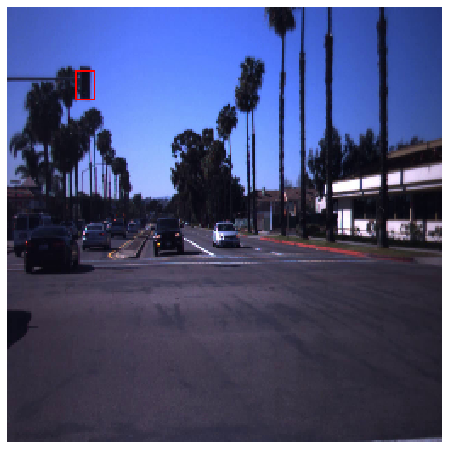

In [27]:
displayImage(image,boxes)

In [29]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cpu


# Training

In [30]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

N_CLASS = 4 

INP_FEATURES = model.roi_heads.box_predictor.cls_score.in_features

model.roi_heads.box_predictor = FastRCNNPredictor(INP_FEATURES, N_CLASS)

In [31]:
model.to(device)

params = [p for p in model.parameters() if p.requires_grad]

optimizer = torch.optim.Adam(params)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)

In [32]:
lossHist = LossAverager()
valLossHist = LossAverager()
import datetime

for epoch in range(EPOCHS):
    
    start_time = time()
    model.train()
    lossHist.reset()
    
    for images, targets, image_ids in tqdm(trainDataLoader):
        
        images = torch.stack(images).to(device)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        
        bs = images.shape[0]
        
        loss_dict = model(images, targets)
        
        totalLoss = sum(loss for loss in loss_dict.values())
        lossValue = totalLoss.item()
        
        lossHist.update(lossValue,bs)

        optimizer.zero_grad()
        totalLoss.backward()
        optimizer.step()
    
    if lr_scheduler is not None:
        lr_scheduler.step(totalLoss)

    print(f"[{str(datetime.timedelta(seconds = time() - start_time))[2:7]}]")
    print(f"Epoch {epoch}/{EPOCHS}")
    print(f"Train loss: {lossHist.avg}")
    
    if(epoch == 10):
        torch.save(model.state_dict(), 'fasterrcnn_resnet{}_fpn.pth'.format(epoch))

100%|████████████████████████████████████████████████████████████████████████████████| 288/288 [51:22<00:00, 10.67s/it]


[51:22]
Epoch 0/1
Train loss: 0.2877574765847789


In [33]:
torch.save(model.state_dict(), 'fasterrcnn_resnet{}_fpn.pth'.format(epoch))

In [36]:
model.load_state_dict(torch.load('fasterrcnn_resnet0_fpn.pth'))

<All keys matched successfully>

In [41]:
from torchvision import transforms

In [42]:
preprocess = transforms.Compose([
    transforms.ToTensor()
])

cap = cv2.VideoCapture("project.avi")

while(True):
    ret, input = cap.read()
    image = input.copy()
    input = preprocess(input).float()
    input = input.unsqueeze_(0)
    input = input.type(torch.cuda.FloatTensor)

    result = model(input)

    boxes = result[0]['boxes'].type(torch.cuda.FloatTensor)
    scores = result[0]['scores'].type(torch.cuda.FloatTensor)
    labels = result[0]['labels'].type(torch.cuda.FloatTensor)

    mask = nms(boxes,scores,0.3)
    boxes = boxes[mask]
    scores = scores[mask]
    labels = labels[mask]

    boxes = boxes.data.cpu().numpy().astype(np.int32)
    scores = scores.data.cpu().numpy()
    labels = labels.data.cpu().numpy()
    mask = scores >= 0.5
    boxes = boxes[mask]
    scores = scores[mask]
    labels = labels[mask]

    colors = {1:(0,255,0), 2:(255,255,0), 3:(255,0,0)}

    for box,label in zip(boxes,labels):
        image = cv2.rectangle(image,
                          (box[0], box[1]),
                          (box[2], box[3]),
                          (0,0,255), 1)

    cv2.imshow("image", image)
    
    if cv2.waitKey(0):
        break

AttributeError: 'NoneType' object has no attribute 'copy'